### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# загрузка библиотеки, необходимой для работы с таблицей
import pandas as pd
# загрузка библиотек, необходимых для графического анализа статистических данных
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка базы данных по квартирам, в качестве разделителя выступает табуляция '\t'
apartments = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# вывод первых пяти наблюдений выборочной совокупности 
apartments.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
# вывод общей информации по выборочной совокупности
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно вышеприведенной таблице, каждая кватира характеризуется 22-мя показателями. К числу данных показателей относятся следующие:
- количество снимков - total_images
- стоимость квартиры - last_price
- общая площадь (в $м^{2}$) квартиры - total_area, жилая площадь - living_area, площадь кухни - kitchen_area
- первый день публикации объявления о продаже жилья - first_day_exposition
- количество комнат в квартире - rooms
- высота потолка (в метрах) - ceiling_height
- количество этажей в доме - floors_total
- этаж, на котором расположена квартира - locality_name
- наличие апартаментов is_apartment, балкона - balcony (0 в случае отсутствия, 1 в противном случае)
- квартира-студия, т.е квартира в которой нет межкомнатных стен и отдельных комнат.
- квартиры со свободной планировкой - open_plan
- название населенного пункта, в котором расположена квартира - locality_name
- расстояние (в метрах) до ближайшего аэропорта - airports_nearest, центра города - cityCenters_nearest, ближайшего парка - parks_nearest и ближайшего пруда - ponds_nearest.
- количество парков - parks_around3000, прудов - ponds_around3000 в радиусе 3 км
- количество дней опубликации объявления - days_exposition.

Выборочная совокупность включает 23 699 наблюдения. Также имеем разнородные типы переменных. В частности, две переменные с булевы значением (bool), 14 переменных с плавающей точкой (float64), 3 целочисленные переменные (int64), 3 переменные со строковыми значениями (object).

Cтоит отметить, что необходимо также осуществить преобразование формата некоторых переменных. В частности, такие переменные как (а) количество этажей в доме *floors_total*, (б) этаж дома *floor*, (в) количество прудов в радиусе 3 км *ponds_around3000*, (г) количество парков в радиусе 3 км *parks_around3000*, (д) количество дней размещения публикации о продаже *days_exposition*, стоит перевести с формата с плавающей точки *float* в целочисленный формат *int*.

In [5]:
# Далее, определим количество пропущенных наблюдений по каждой переменной, 
# осуществим сортировку по убыванию количества пропущенных наблюдений
apartments.isnull().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
ponds_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
first_day_exposition        0
last_price                  0
total_area                  0
studio                      0
rooms                       0
floor                       0
open_plan                   0
total_images                0
dtype: int64

In [6]:
# выделим количество наблюдений исходной выборочной совокупности
initial_dataframe_shape = apartments.shape

### Вывод

На данном этапе исследования стоит отметить следующие промежуточные выводы:
- Наибольшая часть пропущенных значений наблюдается в переменных "наличие апартаментов, балконов, парков, прудов, количество парков и водоемов в радиусе 3 км". Возможной причиной является то, что, действительно, в данных квартирах отсутствуют (а) апартаменты, (б) балконы, (в) парки и (г) пруды в близлежащей местности. Что позволяет осуществить замену данных пропущенных переменных нулевыми значениями. А жаль не иметь балкон с видом на достопримечательности Санкт-Петербурга.
- Наличие пропущенных наблюдений по расстоянию от аэропортов, центров города может быть обусловлено тем, что данные квартиры весьма отдалены от подобных инфраструктурных объектов и владельцы данных квартир стараются скрыть определенные неудобства размещаемой недвижимости. В качестве варианта обработки данных пропущенных наблюдений может выступать расстояние третьего квартиля, того значения при котором 75% наблюдений меньше данной величины, Максимальное значение вероятнее всего не подойдет, среднее значение скорее тоже, так как если было бы недалеко, то владельцы указали бы подобную близость.
- Наличие пропущенных наблюдений по количеству дней публикации объявления может быть обусловлено тем, что (а) менее благоприятные квартиры имеют наибольшую продолжительность размещения объявления: владельцы данных квартир могут скрывать "возраст" объявления, (б) возникли технические ошибки при заполнении объявления. В качестве варианта обработки данных пропущенных наблюдений может выступать дата первого квартиля, того значения при котором 25% наблюдений раньше данной даты, т.е. можно предложить ту дату, которая и не слишком поздняя но и немного не дотягивает до середины рассматриваемого периода. Более поздние периоды скорее не подойдут, так как владельцы сразу бы указали на "молодой возраст" квартиры.
- Более сомнительными являются пропущенные наблюдения по "площади кухни, жилой площади, высоте потолков, количеству этаже в доме". Причинами пропущенных наблюдений могут быть (а) потолки слишком низкие (или напротив, слишком высокие), площадь кухни и  жилая площадь весьма малы, что и скрывают владельцы, (б) технические ошибки заполнения. В данном случае, в качестве варианта заполнения подобных пропущенных переменных нулями является нецелесообразным: ведь не можем мы иметь квартиру с нулевые значениями высоты потолка, площади кухни, жилой площади и с нулевым количеством этажей в доме. Также замена пропущенных данных наблюдений на числовые характеристики: среднее арифметическое, медиана, мода, также является неподходящим способом,так как квартиры имеют весьма разнородный характер по количеству этажей в доме, площади кухни, жилой площади. Возможно владельцы могут осознавать то, что часть потенциальных клиентов предпочитают более высотные дома (мало подъездов, но много этажей), некоторые, напротив, более коренастые дома, т.е. с малым количеством этажей но с большим количеством подъездов. Квартиры с низкими потолками могут приводить к неудобствам во время проживания (могут вызвать чувство стесненности), квартиры с весьма высокими потолками могут свидетельствовать о раритетности дома в целом, т.к. более старинные дома имеют высокие потолки.

### Шаг 2. Предобработка данных

In [7]:
# Ранее, определили возможные причины пропуска, теперь приступим к заполнению подобных дыр.
# Начнем с более простых вариантов, в частности, замена пропущенных переменных нулевыми значениями.
# Определим наименования столбцов, в которых пропущенные наблюдения будут заполнены нулевыми значениями:
# наличие апартаментов и балкона;
columns_to_zero = ['is_apartment','balcony']
# осуществим непосредственную замену пропущенных наблюдений нулевыми значениями посредством следующего цикла
for column in columns_to_zero:
    try:
        apartments[column].fillna(value=0, inplace=True) # замена на месте
    except:
        print('Стоит пересмотреть цикл')

In [8]:
# определим уникальные значения переменной наличие апартаментов 'is_apartment'
apartments['is_apartment'].unique()

array([0, True], dtype=object)

In [9]:
# Методом .where() заменим значения True на единицу
# сохранив нулевые значения.
apartments['is_apartment'].where(apartments['is_apartment']==0, 1, inplace=True) # замена на месте

In [10]:
# проверим действенность замены
apartments['is_apartment'].unique()

array([0, 1], dtype=object)

Действительно, теперь значения переменной 'is_apartment' приведены к единому знаменателю (0 либо 1).

In [11]:
# вновь определим количество пропущенных наблюдений по каждой переменной по убыванию
apartments.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
studio                      0
floor                       0
is_apartment                0
open_plan                   0
balcony                     0
total_images                0
dtype: int64

Для осуществления обоснованной замены остальных пропущенных переменных определим общую картину последних с последующей корректировкой "дыр" выборочной совокупности.

In [12]:
# определим числовые характеристики расстояния до ближайшего парка
# также округлим числовые характеристики до сотых в целях лаконичного представления результатов
round(apartments['parks_nearest'].describe(), 2)

count    8079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max      3190.00
Name: parks_nearest, dtype: float64

Самое близкое расстояние до ближайшего парка составляет 1 метр, наибольшее: 3.19 км.

In [13]:
# определим квартиры, расстояние которых до ближайшего парка составляет менее 5-ти метров.
apartments.query('parks_nearest < 5')['parks_nearest']

11949    3.0
14624    1.0
22941    4.0
Name: parks_nearest, dtype: float64

Географические параметры имеют широкий диапазон возможных величин, что затрудняет задачу. В данном случае, стоит уточнить у первоисточников о данной проблеме с указанием отсутствия наблюдений в отношении таких географических параметров как расстояние (а) до ближайшего аэропорта, (б) пруда и (в) парка, (г) от центра города. Пропущенные наблюдения по последним географическим характеристика отметим одной из индикаторных переменных - нулями.

In [14]:
# осуществим замену пропущенных наблюдений в переменной "расстояние до ближайшего парка" нулями
apartments['parks_nearest'].fillna(value=0,inplace=True) # замена на месте

In [15]:
# осуществим замену пропущенных наблюдений по количеству парков в радиусе 3 км нулями
apartments['parks_around3000'].fillna(value=0, inplace=True)

In [16]:
# определим числовые характеристики расстояния до ближайшего пруда
# также округлим числовые характеристики до сотых в целях лаконичного представления результатов
round(apartments['ponds_nearest'].describe(), 2)

count    9110.00
mean      517.98
std       277.72
min        13.00
25%       294.00
50%       502.00
75%       729.00
max      1344.00
Name: ponds_nearest, dtype: float64

Санкт-Петербург имеет выход к Финскому заливу, также река Нева пересекает культурную столицу, поэтому неудивительно, что наибольшее расстояние до ближайшего пруда всего лишь 1 344 метра.

In [17]:
# осуществим замену пропущенных наблюдений в переменной "расстояние до ближайшего пруда" нулями
apartments['ponds_nearest'].fillna(value=0, inplace=True) # замена на месте

In [18]:
# осуществим замену пропущенных наблюдений по количеству прудов в радиусе 3 км единицами
apartments['ponds_around3000'].fillna(value=0, inplace=True) # замена на месте

В дальнейшем переведем значения в целочисленный формат, ведь мы можем иметь, либо не иметь пруд, без промежуточных значений.

In [19]:
# определим числовые характеристики высоты потолка
# округлим числовые характеристики до сотых в целях лаконичного представления результатов
round(apartments['ceiling_height'].describe(), 2)

count    14504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [20]:
# определим первые 15 квартир с наиболее низкими потолками (посредством фильтра по возрастанию)
for flat in apartments.sort_values('ceiling_height')['ceiling_height'].head(15):
    print(flat, end=' | ')

1.0 | 1.2 | 1.75 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.0 | 2.2 | 

In [21]:
# определим первые 15 квартир с наиболее высокими потолками (посредством фильтра по убыванию)
for flat in apartments.sort_values('ceiling_height', ascending=False)['ceiling_height'].head(15):
    print(flat ,end=' | ')

100.0 | 32.0 | 32.0 | 27.5 | 27.0 | 27.0 | 27.0 | 27.0 | 27.0 | 27.0 | 27.0 | 27.0 | 26.0 | 25.0 | 25.0 | 

Значения в диапазоне 25-100 метров является неправодобно высокими. Более реалистичной является высота до 3-х метров.\
Согласно таблице числовых характеристик, 75% квартир имеют высоту менее 2.8 метра. Используем данный третий квартиль для определения пороговой величины, превышение которой приравнивает слишком высокие величины потолков к данному пороговому значению в 2.8 метра.

In [22]:
# воспользуемся методом .where() для переменной высота потолка 'ceiling_height',
# в качестве порогового значения для слишком больших величин выступает величина третьего квартиля,
# т.е. значения при котором 75% квартир имеют меньшее значение, в частности 2.8 метра:
# если высота потолка превышает 2.8 метра, то данная высота приравнивается к медианной величине,
# т.к. можно предполагать что высота потолка является стандартной величиной
(
    apartments['ceiling_height']
    .where(apartments['ceiling_height'] <= apartments['ceiling_height'].describe()['75%'], # оставляем прежними
           apartments['ceiling_height'].median(), # меняем на медианное значение
           inplace=True) # замена переменных на месте
)

In [23]:
# вновь определим числовые характеристики для высоты потолка квартир
apartments['ceiling_height'].describe()

count    23699.000000
mean         2.631357
std          0.077773
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max          2.800000
Name: ceiling_height, dtype: float64

In [24]:
# аналогично, воспользуемся методом .where(), для переменной высота потолка 'ceiling_height',
# в качестве порогового значения для слишком малых выступает величина первого квартиля,
# т.е. значения при котором 25% квартир имеют меньшее значение, в частности 2.6 метра:
# если высота потолка не превышает 2.6 метра, то данная высота приравнивается к 2.6-х метра,
# т.к. можно предполагать что последняя величина - минимально допустимая высота потолка
(
    apartments['ceiling_height']
    .where(apartments['ceiling_height'] >= apartments['ceiling_height'].describe()['25%'], # оставляем прежними
           apartments['ceiling_height'].describe()['25%'], # меняем на значение первого квартиля
           inplace=True)  # замена переменных на месте
)

In [25]:
# определим числовые характеристики расстояния до ближайшего аэропорта
# округлим числовые характеристики до сотых в целях лаконичного представления результатов
round(apartments['airports_nearest'].describe(), 2)

count    18157.00
mean     28793.67
std      12630.88
min          0.00
25%      18585.00
50%      26726.00
75%      37273.00
max      84869.00
Name: airports_nearest, dtype: float64

Наиболее отдаленное расстояние до ближайшего аэропорта составляет почти 85 км.

In [26]:
# осуществим замену пропущенных переменных расстояния до ближайшего аэропорта нулями
apartments['airports_nearest'].fillna(value=0, inplace=True)

In [27]:
# определим числовые характеристики расстояния до центра города
# округлим числовые характеристики до сотых в целях лаконичного представления результатов
round(apartments['cityCenters_nearest'].describe(), 2)

count    18180.00
mean     14191.28
std       8608.39
min        181.00
25%       9238.00
50%      13098.50
75%      16293.00
max      65968.00
Name: cityCenters_nearest, dtype: float64

Наиболее отдаленное расстояние до центра города составляет почти 66 км.

In [28]:
# осуществим замену пропущенных переменных расстояния до центра города нулями (т.е. индикаторной переменной)
apartments['cityCenters_nearest'].fillna(value=0, inplace=True)

In [30]:
# определим числовые характеристики количества дней размещений публикации
apartments['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Для заполнения пропущенных наблюдений в количестве дней размещения публикации стоит также воспользоваться переменной "начало даты размещения объявления" *first_day_exposition*. Последняя переменная имеет формат "object", т.е. формат строки. Стоит перевести формат строки в формат datetime, который более удобен для операций с датами (в том числе и извлечение года, месяца, дня).

In [31]:
# осуществим перевод с форматам строки в формат datetime, также укажем последовательность временных измерений,
# а именно "год-месяц-деньTчас:минута:секунда"
apartments['first_day_exposition'] = pd.to_datetime(apartments['first_day_exposition'],
                                                    format='%Y-%m-%dT%H:%M:%S')

In [32]:
apartments['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Наиболее ранняя дата размещения объявления: 21 ноября 2014 года, наиболее поздняя дата: 3 мая 2019 года.

In [33]:
# определим самую последнюю дату на момент конечного сбора выборочной совокупности
# посредством добавления одного дня к самой последней дате размещения публикации
last_day_exposition = apartments['first_day_exposition'].max() + pd.Timedelta(days=1)
# вывод последней даты на момент конечного сбора статистических данных
last_day_exposition

Timestamp('2019-05-04 00:00:00')

Таким образом, конечный сбор выборочной совокупности датируется **четвертым мая 2019 года.**

Далее, предположим следующее: те квартиры у которых отсутствует количество дней размещения публикации еще не проданы на момент конечного сбора данных.\
Тем самым, у данных квартир количество дней размещения публикации составляет разность между датой конечного сбора выборочной совокупности (в частности, четвертое мая 2019 года) и начальной датой публикации объявления соответствующей квартиры, которые содержатся в столбце 'first_days_exposition'. Далее, посредством метода *.dt.days* извлечем количество дней полученной разности дат.

In [34]:
# заполним пропущенные наблюдения в столбце 'days_exposition'
# посредством количества дней разности между датой конечного сбора данных и начальной датой размещения объявления
apartments['days_exposition'] = (
    apartments['days_exposition']
    .transform(lambda x: x.fillna(value=(last_day_exposition - apartments['first_day_exposition']).dt.days))
)

In [35]:
# определим числовые характеристики площади кухни 
apartments['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Весьма большой разрыв между самой малой и самой большой площадью кухни. Резкий переход от третьего квартиля в размере 12 $м^{2}$, до самой максимальной площади кухни в 112 $м^{2}$.

In [36]:
# определим числовые характеристики процентного соотношения площади кухни к общей площади квартир
((apartments['kitchen_area'] / apartments['total_area']) * 100 ).describe()

count    21421.000000
mean        18.735474
std          7.296781
min          2.538071
25%         13.333333
50%         17.241379
75%         23.241590
max         78.787879
dtype: float64

Cреднее значение и медиана процентного соотношения площади кухни к общей площади квартиры близки к 20-ти процентам. В силу того, что имеем полные наблюдения по общей площади квартир, можем восстановить площадь кухни исходя из процентного соотношения последней величины к общей площади квартир.

In [37]:
# заполним пропущенные величины площадей кухни посредством умножения общей площади квартиры на 20 процентов,
# исходя из ранее определенного процентного соотношения
# воспользуемся конструкцией обработки исключений
try:
    apartments['kitchen_area'].transform(lambda x: x.fillna(value=apartments['total_area']*0.2, inplace=True))
    print('Пробуем первый метод с заменой на месте')
except:
    apartments['kitchen_area'] = apartments['kitchen_area'].transform(lambda x: x.fillna(value=apartments['total_area']*0.2))
    print('Пробуем второй метод с формирование дополнительного столбца')

Пробуем второй метод с формирование дополнительного столбца


In [38]:
# определим числовые характеристики жилой площади квартир
apartments['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Наименьшая площадь жилого помещения равна 2 кв.м., наибольшшая около 410 кв.м.\
В среднем, площадь жилого помещения составляет 34 кв.м.

In [39]:
# отобразим числовые характеристики процентного отношения жилой площади к общей
((apartments['living_area'] / apartments['total_area'])*100 ).describe()

count    21796.000000
mean        56.476552
std         10.536828
min          2.158273
25%         49.517685
50%         56.785990
75%         63.787984
max        100.000000
dtype: float64

Видим, что зачастую отношение жилой площади к общей площади квартиры составляет 56%. Это и правдоподобно то, что половину квартиры (и чуть больше) занимает жилая площадь.

In [40]:
# исходя из числовых характеристик заменим пропущенные переменные по жилой площади посредством
# умножения общей площади квартиры на 56 процентов (последняя величина равна как среднему значению так и медиане)
apartments['living_area'] = apartments['living_area'].transform(lambda x: x.fillna(value=apartments['total_area']*0.56))

### "Количество этажей в доме".

In [41]:
# определим числовые характеристики количества этажей в доме
apartments['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Видим, что самый высокий дом имеет 60 этажей, также наблюдаются одноэтажные дома.

Воспользуемся переменной "расстояние до центра города" дабы удостовериться в том, что высокие дома, которые находятся близко к центру города представляют собой современные здания, т.е. выявить являются ли большие значения оправданно таковыми.

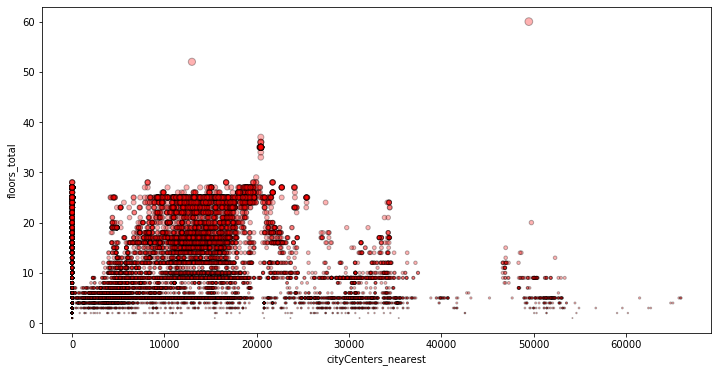

In [42]:
# построим диаграмму рассеяния между количеством этажей в доме (оси ординат) и
# расстоянием до центра города в метрах (ось абсцисс)
# размер точек определяется количеством этажей в доме
apartments.plot(kind='scatter',x='cityCenters_nearest',y='floors_total',
          edgecolor='black', color='red', s=apartments['floors_total'], alpha=0.3, figsize=(12,6))

Согласно вышеприведенной диаграмме рассеяния, дом в 60 этажей находится в 50 км от центра города. Видим что те дома, которые находятся далеко от центра (боле 40 км) имеют мало этажей (возможно дома старой постройки).

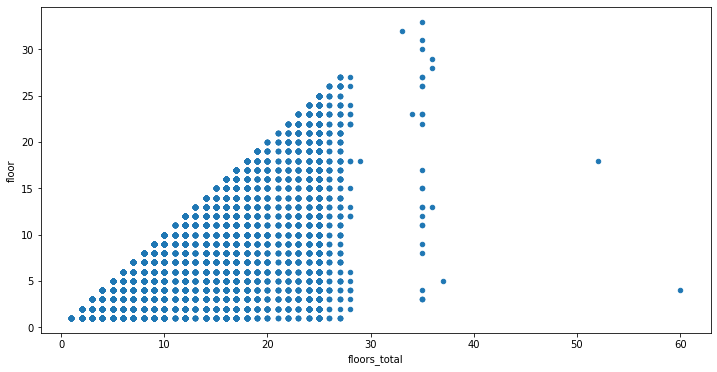

In [43]:
# построим диаграмму рассеяния между количеством этажей (ось абсцисс) и 
# этажом, на котором находится квартира (ось ординат)
apartments.plot(kind='scatter', x='floors_total', y='floor', figsize=(12,6))

Видим два ярко выраженных дома с высотой в пределе от 50-ти до 60-ти этажей.

In [44]:
# ранее было выявлено, что общее число пропущенных наблюдений по количеству этажей в доме составляет 86, опираясь
# на последнее определим этаж квартир, при которых отсутствуют наблюдения по общему количеству этажей в доме
# и выведем последние 86 наблюдений
apartments[['floors_total','floor']].sort_values(by=['floors_total','floor']).tail(86)

,floors_total,floor
237,NaN,1
3817,NaN,1
15989,NaN,1
9979,NaN,2
20250,NaN,2
...,...,...
21753,NaN,21
2392,NaN,22
14264,NaN,23
6030,NaN,24


Видим что пропущенные наблюдения по количеству этажей в доме присутствуют как и в квартирах, которые находятся на 1-ом этаже, так и на 24-ом этажах.

Замена количества этажей в доме весьма творческое задание. С одной стороны, использовать стандартные подходы наподобие замены нулями, средними арифметическими (как общими, так и по определенной местности), медианой, является менее предпочтительным вариантом Отметим пропущенные переменные одной из индикаторных переменных - нулями.

In [45]:
# заполнение пропущенных наблюдений по количеству этажей в доме нулями
apartments['floors_total'].fillna(value=0, inplace=True)

In [46]:
# заполним пропущенные наблюдения в отношении названий населенных пунктов следующим вариантом "Неизвестно" 
apartments['locality_name'].fillna(value='Неизвестно', inplace=True)

In [47]:
# как в начале было указано, осуществим замену форматов переменных:
# те переменные которые стоит перевести и формата с плавающей точкой в целочисленный формат:
# количество прудов и парков в радиусе 3 км, количество дней публикации объявления, этаж дома, количество балконов
# Причина того, что именно в целочисленный весьма интуитивен: вряд ли можем иметь половину парка,
# половину этажа или половину балкона (разве что квартира и дом очень старые)
float_to_int = ['parks_around3000','ponds_around3000','days_exposition','floor','balcony']

# определим соответствующий цикл
for column_1 in float_to_int:
    # замены с формата с плавающей точкой в целочисленный формат
    apartments[float_to_int] = apartments[float_to_int].astype('int')

# переведем строковый формат переменной "наличие апартаментов" в булев формат,
# наличие строкового формат было обусловлено наблюдениями True, что в начале были заменены на единицы
# т.к. данная переменная имеет всего два значения (0,1) то подобное преобразование формата является обоснованным
obj_to_bool = ['is_apartment']

# определим соответствующий цикл
for column_2 in obj_to_bool:
    # замены со строкового формат на булев тип
    apartments[column_2] = apartments[column_2].astype('bool')
    
# остальные переменные имеют подходящий формат: так площадь кухни, жилая и общая площадь квартиры
# могут принимать как целые числа так и промежуточные значения, т.е. оставляем формат с плавающей точкой
# переменные со строковым форматом, в частности название населенного пункта, также оставляем прежними.

### Шаг 3.

Добавим в таблицу переменную "цена за $м^{2}$".

In [48]:
# определим столбец 'price_per_meter', в котором отражены
# значения отношения цены квартиры на момент снятия с публикации к общей площади квартиры
apartments['price_per_meter'] = apartments['last_price'] / apartments['total_area']

In [49]:
# добавим столбец 'week_exposition', который отражает неделю публикации
apartments['week_exposition'] = apartments['first_day_exposition'].dt.week
# добавим столбец 'month_exposition', который отражает месяц публикации
apartments['month_exposition'] = apartments['first_day_exposition'].dt.month
# добавим столбец 'year_exposition', который отражает год публикации
apartments['year_exposition'] = apartments['first_day_exposition'].dt.year

In [50]:
# определим функцию, которая определяем категорию квартир в зависимости от этажа
def floor_category(data):
    '''
    data: выборочная совокупность,
    output: определение категорий в зависимости от этажа квартиры:
    (1) первый, (2) последний, (3) другой
    '''
    # выделяем этаж квартир
    floor = data['floor']
    # выделяем общее количество этажей в доме
    floors_total = data['floors_total']
    
    if floor == 1:
        return 'первый'
    # будет логичным предполагать если этаж квартиры равен максимальному количеству этажей в доме, то 
    # данная квартира попадает в категорию "последний" этаж
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [51]:
# сформируем столбец 'floor_category' посредством применения функции 'floor_category' к выборочной совокупности
apartments['floor_category'] = apartments.apply(floor_category, axis=1)

In [52]:
# осуществим подсчет квартир в зависимости от категории этажности
apartments['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [53]:
# определим новый столбец 'living_to_total_ration', который равен отношению жилой площади к общей площади квартиры
apartments['living_to_total_ratio'] = apartments['living_area'] / apartments['total_area']
# определим новый столбец 'living_to_total_ration', который равен отношению площади кухни к общей площади квартиры
apartments['kitchen_to_total_ratio'] = apartments['kitchen_area'] / apartments['total_area']

На данном шаге определены следующие столбцы: (1) цена за $м^{2}$, (2) категории квартир в зависимости от этажа, (3) отношение жилой площади к общей площади квартиры, (4) отношение площади кухни к общей площади.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

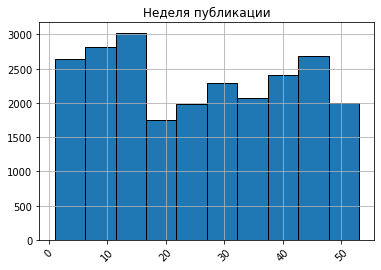

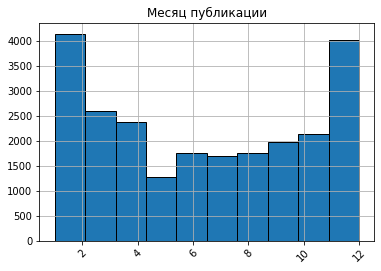

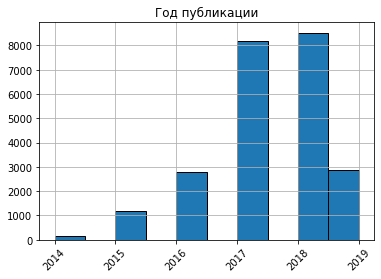

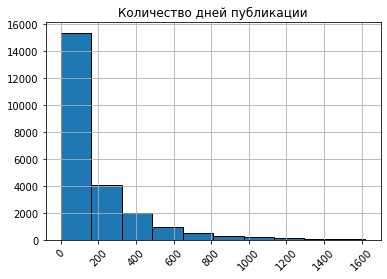

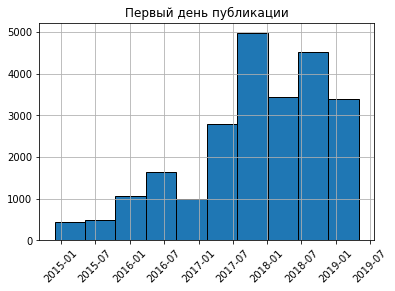

In [54]:
# определим столбцы, отражающие дату публикации объявления:
# неделя, месяц, год, количество дней и первый день публикации объявления о продаже недвижимости
date_columns = {'week_exposition':'Неделя публикации', 'month_exposition':'Месяц публикации',
                'year_exposition':'Год публикации', 'days_exposition':'Количество дней публикации',
                'first_day_exposition':'Первый день публикации'}

# автоматизируем построение гистограмм посредством цикла
for key, value in date_columns.items():
    # также определим заголовки графиков
    apartments[key].hist(edgecolor='black').set(title=value) 
    # поворот подписей оси абсцисс на 45 градусов
    plt.xticks(rotation=45)
    # отображение графика
    plt.show()

В начале и в конце года меньше всего наблюдений: вероятно из-за каникул на данных этапах года люди более свободны  для осуществления покупок в том числе и приобретение недвижимости. Также меньше всего объявлению наблюдаются на 19-20 недели (начало мая): аналогично, с наступление майских праздников люди освобождаются с работы и приобретают активы, к числу которых также может и относиться жилье. Пики достигаются приблизительно на 5-ой (приблизительно середина февраля): вероятно, в холодные периоды года людям менее охотно выделять время и осматривать квартиры, 15-ой (середина апреля), 45-ой (начало ноября: повышение объявление в данный период может быть обусловлено тем, что владельцы намечают планы на последующий год и стремятся продать недвижимость для реализации планов) неделях.

Меньше всего объявление в январе, и мае (аналогично, вероятно из-за новогодних и майских праздников у людей появляется больше свободного времени для приобретения активов, в т.ч. и жилья). Пик количества объявлений достигает в декабре: как и ранее, владельцы, могут намечать планы и одним из способов реализации которых является продажа недвижимости.

С одной стороны, наименьшее количество публикаций наблюдается в декабре, мае и январе. Возможной причиной является то, что в данные периоды времени по причине праздников люди имеют больше свободного времени, которое частично используют для приобретения жилья. Со стороны владельцев может быть то, что последние в период праздников меньше заботятся о размещении публикации о продаже недвижимости.Седьмой-восьмой месяц (июль, август) - период отпусков, люди также частично используют время на покупку жилья, в то время как владельцы озабочены отдыхом, нежели коммерческой деятельностью. \
С другой стороны, в феврале, марте и апреле люди (потенциальные клиенты) могут быть более нагружены работой и поэтому меньше совершаются покупок недвижимости.

Значительная часть объявлений приходятся на предшествующие три периода: 2017-2019 гг.

В выборочной совокупности значительная часть публикаций датируются 2017-2019 гг. Возможно то, что более давние публикации менее надежные: в данных квартирах можно обнаружить некоторые недостатк в форме большой отдаленности до центра города, изолированность от прудов и парков, отсутствие балкона и/или апартаментов.

In [55]:
# определим числовые характеристики дней публикации объявления
apartments['days_exposition'].describe()

count    23699.000000
mean       185.955948
std        233.399427
min          1.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1619.000000
Name: days_exposition, dtype: float64

Тем самым, наблюдаем недвижимость которая находилось на публикации в течение 1 619 дней (приблизительно чуть больше 4-х лет). **Медиана** составляет 94 дня, т.е. в среднем продажи занимают чуть более трех месяцев. **Среднее количество** дней публикации объявления равно 185-ти дням.\
Продажи можно считать относительно быстро за 43 дня (полтора месяца), что равно величине **первого квартиля**.\
Относительно долгим является период между **третьим квартилем** и максимальным значением: в частности, более 237 дней (более семи месяцев).

### Построение гистограмм после обработки пропусков

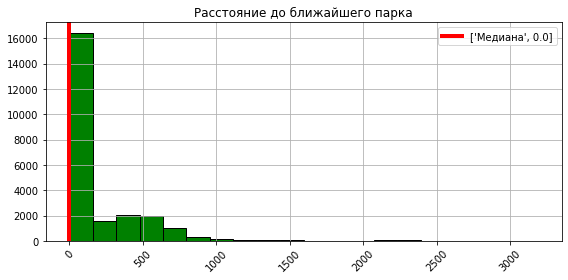

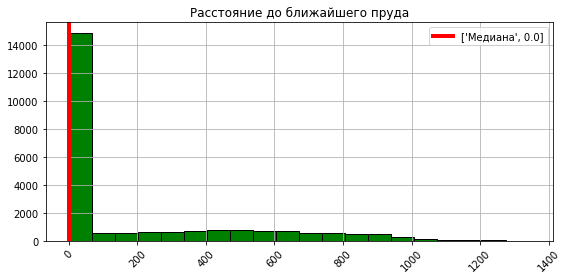

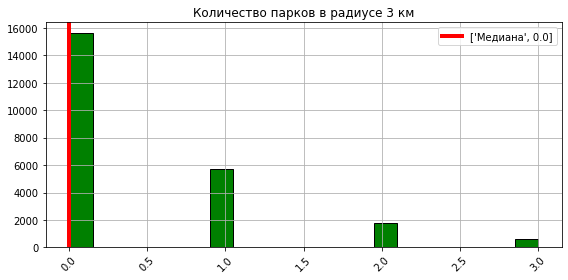

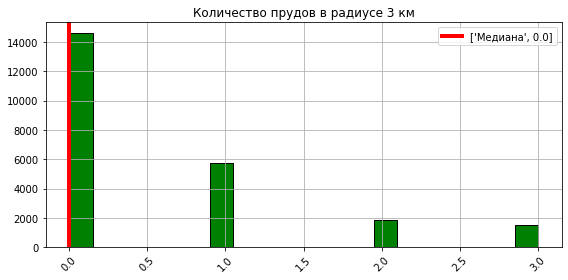

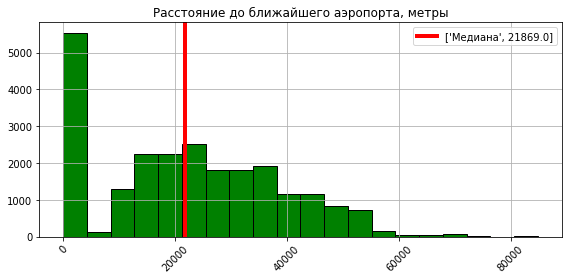

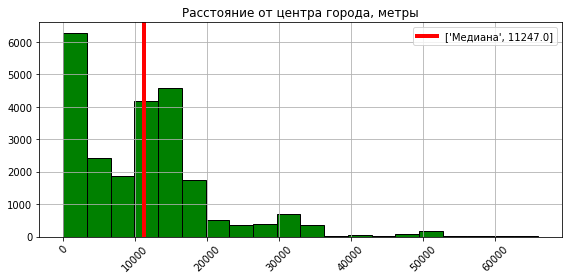

In [56]:
# выделим географические переменные, в которых осуществили пропуск пропущенных переменных:
na_filled_geography = {'parks_nearest':'Расстояние до ближайшего парка',
                       'ponds_nearest':'Расстояние до ближайшего пруда',
                       'parks_around3000':'Количество парков в радиусе 3 км',
                       'ponds_around3000':'Количество прудов в радиусе 3 км',
                       'airports_nearest':'Расстояние до ближайшего аэропорта, метры',
                       'cityCenters_nearest':'Расстояние от центра города, метры'}
# автоматизируем построение графиков
for key, value in na_filled_geography.items():
    # также определим заголовок для каждого графика
    apartments[key].hist(edgecolor='black',color='green', bins=20, figsize=(8,4)).set(title=value)
    # построим вертикальную линию, которая отражает медиану для каждой переменной
    plt.axvline(x=apartments[key].median(), color='red', lw=4, label=['Медиана',round(apartments[key].median(),2)])
    plt.legend() # отображение легенды
    plt.xticks(rotation=45) # поворт подписей оси абсцисс на 45 градусов
    plt.tight_layout() # "подтянем" график
    plt.show() # отображение каждой гистограммы


Наблюдаем выбивающиеся значения для следующих переменных: расстояние до центра города, ближайшего парка, пруда, аэропорта.

Наибольшая часть квартир не имеет парка и пруда в радиусе 3 км.

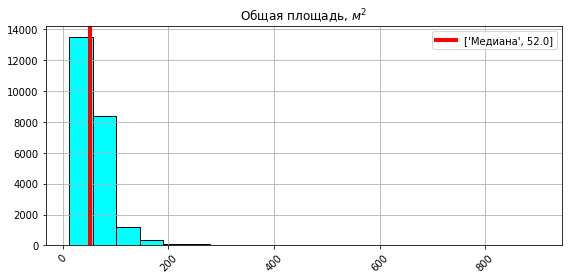

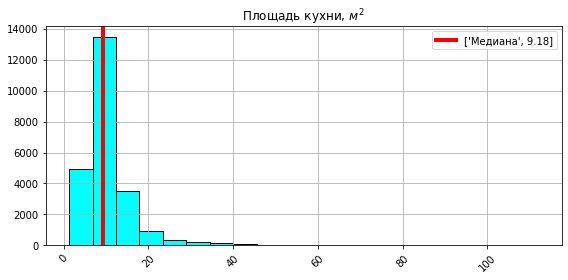

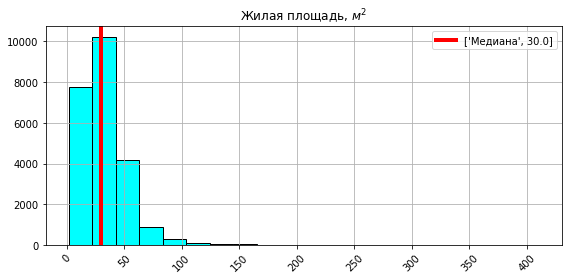

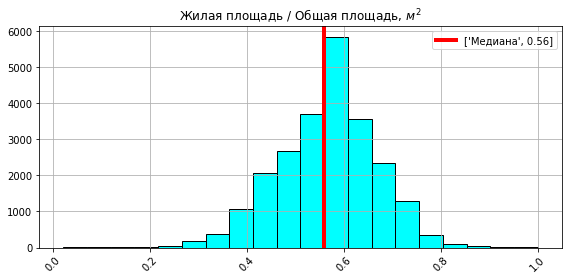

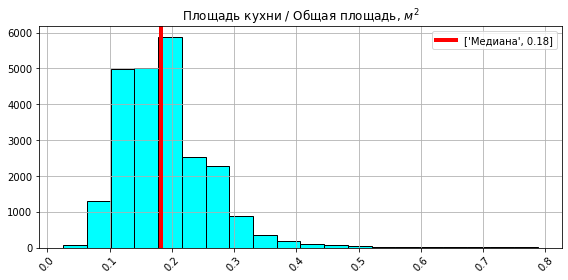

In [57]:
# выделим переменные, отражающие площадь квартир, в которых осуществили пропуск пропущенных наблюдений:
na_filled_area = {'total_area':'Общая площадь, $м^{2}$',
                  'kitchen_area':'Площадь кухни, $м^{2}$',
                  'living_area':'Жилая площадь, $м^{2}$',
                  'living_to_total_ratio':'Жилая площадь / Общая площадь, $м^{2}$',
                  'kitchen_to_total_ratio':'Площадь кухни / Общая площадь, $м^{2}$'}
# автоматизируем построение графиков
for key, value in na_filled_area.items():
    # также определим заголовок для каждого графика
    apartments[key].hist(edgecolor='black', bins=20,color='cyan', figsize=(8,4)).set(title=value)
    # построим вертикальную линию, которая отражает медиану для каждой переменной
    plt.axvline(x=apartments[key].median(), color='red', lw=4, label=['Медиана',round(apartments[key].median(),2)])
    plt.legend() # отображение легенды
    plt.xticks(rotation=45) # поворт подписей оси абсцисс на 45 градусов
    plt.tight_layout()
    plt.show() # отображение каждой гистограммы


В среднем, общая площадь квартир составляет 52 кв.м, площадь кухни: 9.18 кв.м., жилая площадь: 30 кв.м.\
Наибольшая часть квартир имеет отношение "жилая площадь / общая площадь" в 56 процентов.\
Наибольшая часть квартир имеет отношение "площадь кухни / общая площадь" в 20 процентов.

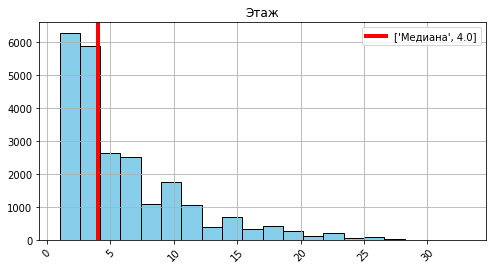

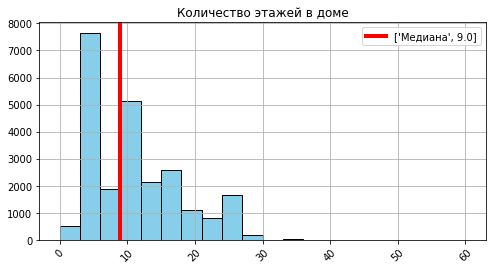

In [58]:
# переменные, которые отражают "высоту" квартиры: этаж и количество этажей в доме
na_filled_height = {'floor':'Этаж','floors_total':'Количество этажей в доме'}

# автоматизируем построение графиков
for key, value in na_filled_height.items():
    # также определим заголовок для каждого графика
    apartments[key].hist(edgecolor='black', bins=20,color='skyblue', figsize=(8,4)).set(title=value)
    # построим вертикальную линию, которая отражает медиану для каждой переменной
    plt.axvline(x=apartments[key].median(), color='red', lw=4, label=['Медиана',round(apartments[key].median(),2)])
    plt.legend() # отображение легенды
    plt.xticks(rotation=45) # поворт подписей оси абсцисс на 45 градусов
    plt.show() # отображение каждой гистограммы


Б**о**льшая часть квартир расположены невысоко, в частности не более четвертого этажа.\
В среднем, имеем 9-ти этажные дома.

---
### Удаление редких и выбивающихся значений.

Для выявления редких значений построим коробчатные диаграммы по характеристикам квартир, отражающие (а) месторасположение, (б) площадь, (в) высоту квартир. 

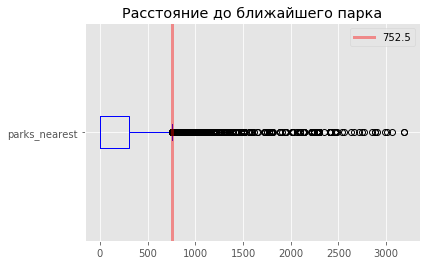

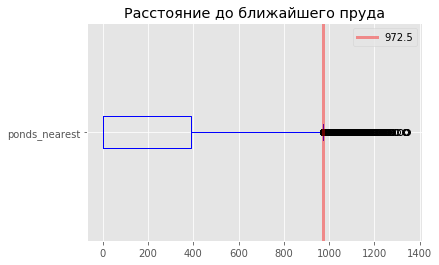

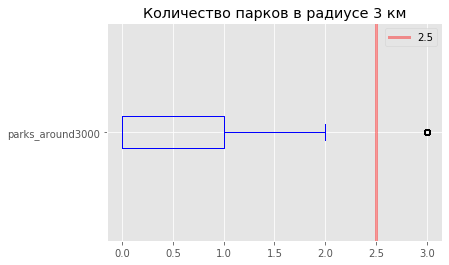

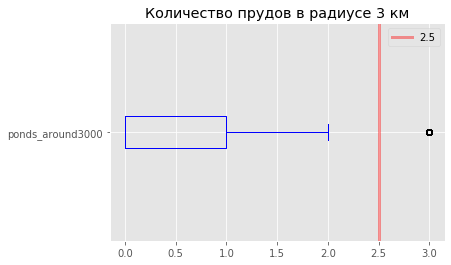

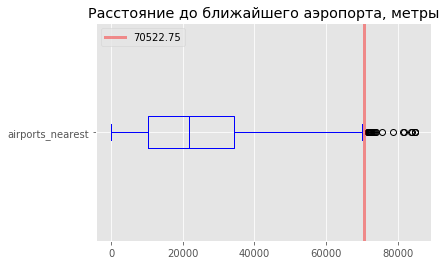

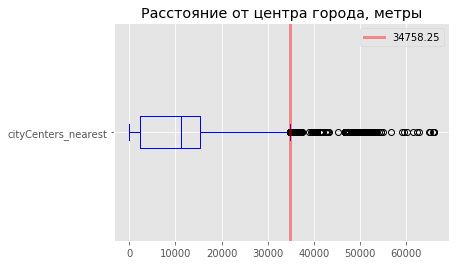

In [59]:
# выделим географические переменные, в которых осуществили пропуск пропущенных переменных:
na_filled_geography = {'parks_nearest':'Расстояние до ближайшего парка',
                       'ponds_nearest':'Расстояние до ближайшего пруда',
                       'parks_around3000':'Количество парков в радиусе 3 км',
                       'ponds_around3000':'Количество прудов в радиусе 3 км',
                       'airports_nearest':'Расстояние до ближайшего аэропорта, метры',
                       'cityCenters_nearest':'Расстояние от центра города, метры'}
# автоматизируем построение графиков
for key, value in na_filled_geography.items():
    # изменим тему графиков
    plt.style.use('ggplot')
    apartments[key].plot(kind='box', grid=True, color='blue', vert=False).set(title=value)
    # для каждой переменной определим верхний предел, равный сумме третьего квартиля и 1.5*межквартильного размаха
    plt.axvline(x=apartments[key].describe()['75%']+ 1.5*(apartments[key].describe()['75%'] - apartments[key].describe()['25%']),
                label= apartments[key].describe()['75%']+ 1.5*(apartments[key].describe()['75%'] - apartments[key].describe()['25%']),
                color='red', lw=3, alpha=0.4)
    plt.legend()
    # sns.boxplot(x=apartments[key]).set(title=value): альтернативный вариант построения коробчатой диаграммы
    plt.show() # отображение каждой гистограммы


Обнаружили выбивающиеся значения в расстоянии до ближайшего аэропорта и центра города. В данном случае, удалим те квартиры, которые далеки от ближайшего аэропорта более чем на 70.522 км, от центра города более чем на 34.758 км. В отношении расстояния до ближайшего парка и пруда скорее удалять наблюдения не стоит, так как расстояние до ближайшего парка в 1-3 км, и ближайшего пруда в 1-1.4 км еще более терпимо нежели расстояние до центра города в более чем на 34 км.

In [60]:
# выделим квартиры, отдаленные от ближайшего аэропорта не более чем 70 522.75 метров
apartments_no_outliers = apartments.query('airports_nearest <= 70522.75')

In [61]:
# выделим квартиры, отдаленные от центра города не более чем на 34 758.25 метров
apartments_no_outliers = apartments_no_outliers.query('cityCenters_nearest <= 34758.25')

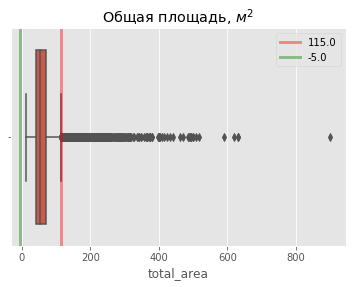

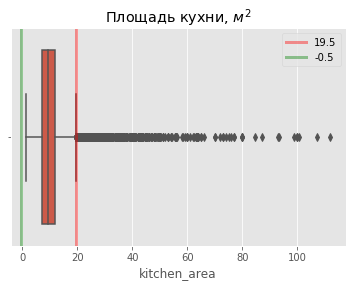

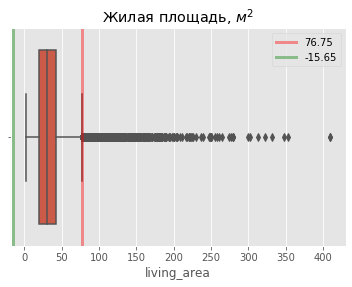

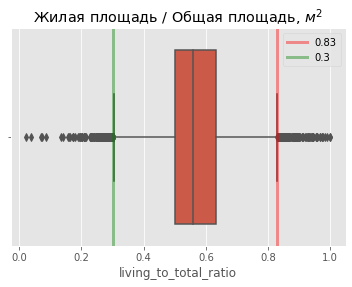

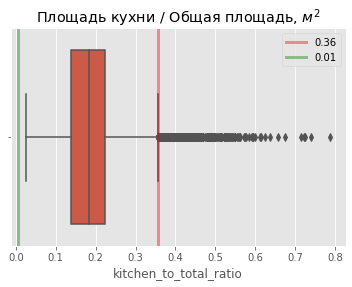

In [62]:
# выделим переменные, отражающие площадь квартир, в которых осуществили пропуск пропущенных наблюдений:
na_filled_area = {'total_area':'Общая площадь, $м^{2}$',
                  'kitchen_area':'Площадь кухни, $м^{2}$',
                  'living_area':'Жилая площадь, $м^{2}$',
                  'living_to_total_ratio':'Жилая площадь / Общая площадь, $м^{2}$',
                  'kitchen_to_total_ratio':'Площадь кухни / Общая площадь, $м^{2}$'}
# автоматизируем построение графиков
for key, value in na_filled_area.items():
    # также определим заголовок для каждого графика
    # apartments[key].plot(kind='box', figsize=(8,4), vert=False).set(title=value): альтернативный вариант построения
    sns.boxplot(x=apartments_no_outliers[key]).set(title=value)
    # для каждой переменной определим верхний предел, равный сумме третьего квартиля и 1.5*межквартильного размаха
    plt.axvline(x=apartments_no_outliers[key].describe()['75%']+ 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),
                label=round(apartments_no_outliers[key].describe()['75%']+ 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),2),
                color='red', lw=3, alpha=0.4)
    # для каждой переменной определим нижний предел, равный разности первого квартиля и 1.5*межквартильного размаха
    plt.axvline(x=apartments_no_outliers[key].describe()['25%']- 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),
                label= round(apartments_no_outliers[key].describe()['25%']- 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),2),
                color='green', lw=3, alpha=0.4)
    plt.legend()
    plt.show() # отображение каждой гистограммы


Удалим квартиры у которых (а) процентное отношение жилой площади к общей площади квартиры больше 83 процента и меньше 3 процентов, (б) площади кухни к общей площади больше 35 процентов, (в) общая площадь которых превышает 600 кв.м.

In [63]:
# выделим квартиры, у которых отношение жилой площади к общей площади не меньше 3-х и не больше 83-х процентов
apartments_no_outliers = apartments_no_outliers.query('0.3 <= living_to_total_ratio <= 0.83')

In [64]:
# выделим квартиры, у которых отношение площади кухни к общей площади не больше 35-ти процентов
apartments_no_outliers = apartments_no_outliers.query('kitchen_to_total_ratio <= 0.35')

In [65]:
# оставим квартиры, общая площадь которые меньше 600 кв.м.
apartments_no_outliers = apartments_no_outliers.query('total_area < 600')

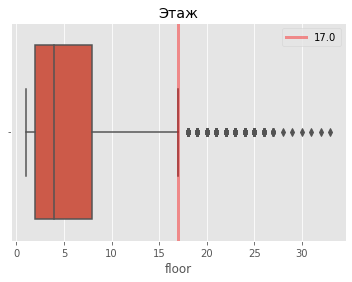

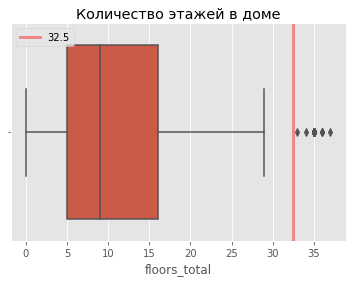

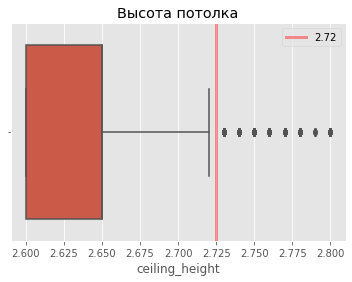

In [66]:
# выделим переменные, которые отражают "высоту" квартиры: этаж и количество этажей в доме
na_filled_height = {'floor':'Этаж','floors_total':'Количество этажей в доме','ceiling_height':'Высота потолка'}

# автоматизируем построение графиков
for key, value in na_filled_height.items():
    # построение коробчатых диаграмм
    sns.boxplot(x=apartments_no_outliers[key]).set(title=value)
    # построение верхней границы, превышение которой вероятнее всего подразумевает выбивающиеся наблюдения
    plt.axvline(x=apartments_no_outliers[key].describe()['75%']+ 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),
                label=round(apartments_no_outliers[key].describe()['75%']+ 1.5*(apartments_no_outliers[key].describe()['75%'] - apartments_no_outliers[key].describe()['25%']),2),
                color='red', lw=3, alpha=0.4)
    plt.legend() # отображение легенды
    plt.show() # отображение каждой гистограммы


Удалим квартиры, которые находятся (а) выше 17-го этажа, (б) в доме с более чем 30-ю этажами. 

In [70]:
apartments_no_outliers

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_exposition,month_exposition,year_exposition,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,58,120370.370370,10,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0,0.0,81,82920.792079,49,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,2,574.0,558,92785.714286,34,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,89.04,9,False,...,3,234.0,424,408176.100629,30,7,2015,другой,0.560000,0.200000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,0.0,55,95065.789474,37,9,2018,другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,2.65,5.0,73.30,3,False,...,3,381.0,774,72490.845228,12,3,2017,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,0,0.0,45,52542.372881,3,1,2018,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,0,0.0,447,44091.710758,6,2,2018,первый,0.523810,0.200000
23697,13,11475000.0,76.75,2017-03-28,2,2.65,17.0,42.98,12,False,...,3,196.0,602,149511.400651,13,3,2017,другой,0.560000,0.303583


In [74]:
# выделим квартиры, этаж которых не больше 17-го
apartments_no_outliers = apartments_no_outliers.query('floors_total <= 17')

In [75]:
# выделим дома с менее 30-ю этажами
apartments_no_outliers = apartments_no_outliers.query('floors_total < 30')

In [76]:
# вывод размерности выборочной совокупности в результате удаления выбивающихся наблюдений
apartments_no_outliers.shape

(18106, 29)

Таким образом, удалили квартиры у которых:
- расстояние от ближайшего аэропорта превышает 70.522 км, от центра города превышает 34.758 км.
- процентное отношение жилой площади к общей площади квартиры больше 83 процента и меньше 3 процентов,
- площадь кухни к общей площади больше 35 процентов,
- общая площадь превышает 600 кв.м.
- этаж выше 17-го.
- дом выше 30-ти этажей.

---
### Ответы на исследовательские вопросы

**Вопрос №1:** "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. 

In [77]:
# выделим переменные, которые отражают
corr_features = ['last_price', # стоимость квартиры
                 'total_area','living_area','kitchen_area', # характеристики площади
                 'rooms','ceiling_height','floor', # другие внутренние характеристики
                 'cityCenters_nearest', # месторасположение 
                 'week_exposition','month_exposition','year_exposition'] # дату публикаций

In [78]:
# выделим квартиры, находящиеся на первом и последнем этажах.
apartments_first_last_floor = apartments_no_outliers.query('floor_category != "другой"')

In [79]:
# определим корреляционную матрицу для вышевыделенных переменных 
corr_matrix_raw = apartments_no_outliers[corr_features].corr()
# отсортируем по убыванию корреляционную матрицу по величине связи переменных со стоимостью квартиры
corr_matrix_desc = apartments_no_outliers[corr_features].corr().sort_values(by=['last_price'],
                                                                            ascending=False)
# определим корреляционную матрицу для квартир, находящиеся на первом и последнем этажах
corr_matrix_first_last_floor = apartments_first_last_floor[corr_features].corr()
# объединим три вышесформированные матрицы в единый лист
corr_matrices = [corr_matrix_raw, corr_matrix_desc, corr_matrix_first_last_floor]

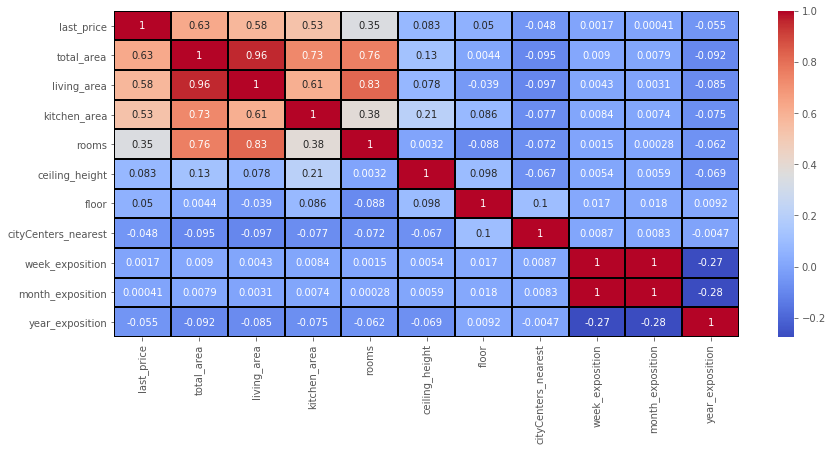

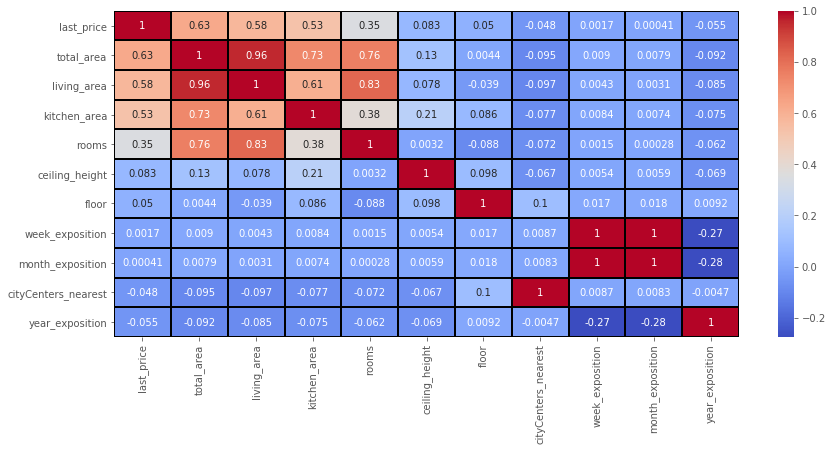

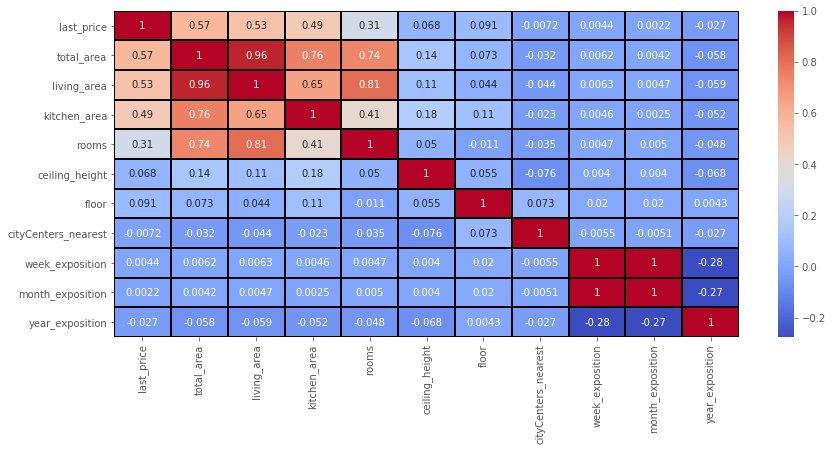

In [80]:
# автоматизируем построение графиков
for matrix in corr_matrices:
    plt.figure(figsize=(14,6)) # увеличим размер графика
    # построим тепловую диаграмму, которая отражает корреляции между переменными
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linecolor='black',linewidths=1)
    # отображение диаграмм
    plt.show()

Со стоимостью квартиры более тесно связаны (а) общая площадь (здесь и далее в скобках указан коэффициент корреляции переменной со стоимостью кв.метра, 0.63); (б) жилая площадь (0.58), (в) площадь кухни (0.52), (г) количество комнат (0.36), менее тесно (д) высота потолков (0.076).\
Переменные, связанные с датой публикации - неделя, месяц, год - не связаны со стоимостью квартиры.\
В отношении квартир, которые находятся на первом и последнем этажах, наблюдаем очень слабую связь с этажом  и стоимостью квартиры, что отражено в коэффициенте корреляции равном 0.091 (третья диаграмма).

In [81]:
# рассчитаем средние значения цены квартиры в разрезе расстояния (в метрах) до центра города
center_price_apartments = apartments_no_outliers.groupby('cityCenters_nearest')['last_price'].mean().reset_index()

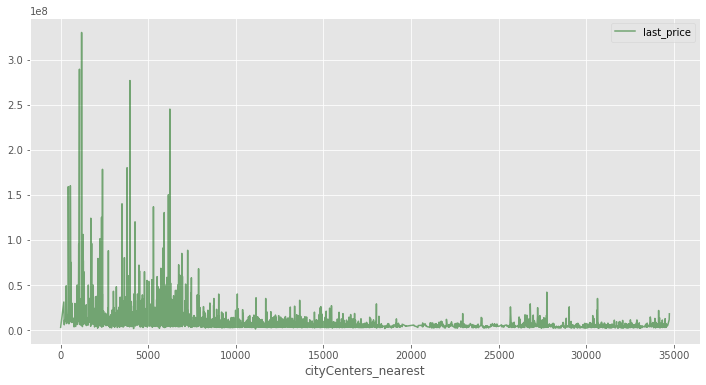

In [82]:
# построим диаграмму рассеяния между удаленностью от центра (ось абсцисс) и стоимостью квартиры (ось ординат)
center_price_apartments.plot(kind='line', x='cityCenters_nearest', y='last_price',
          alpha=0.5, color='darkgreen', figsize=(12,6))

Диаграмма согласуется с логикой: стоимость квартир, более близко расположенных к центру города значительно превышает стоимость квартир, находящихся в более отдаленной местности.

In [83]:
# выделим характеристики, отражающие дату публикации объявления
date_features = {'week_exposition':'неделя публикации объявления',
                 'month_exposition':'месяц публикации объявления',
                 'year_exposition':'год публикации объявления'}

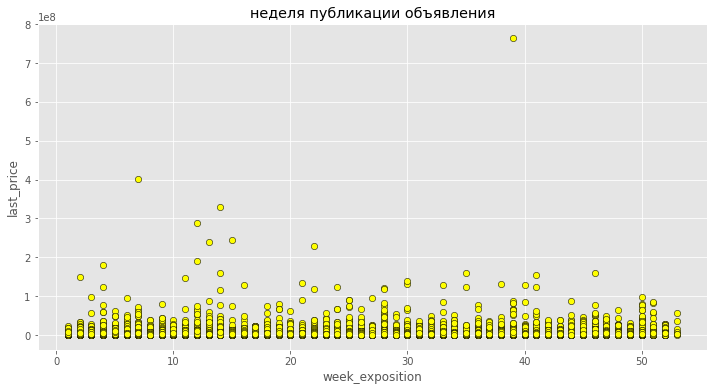

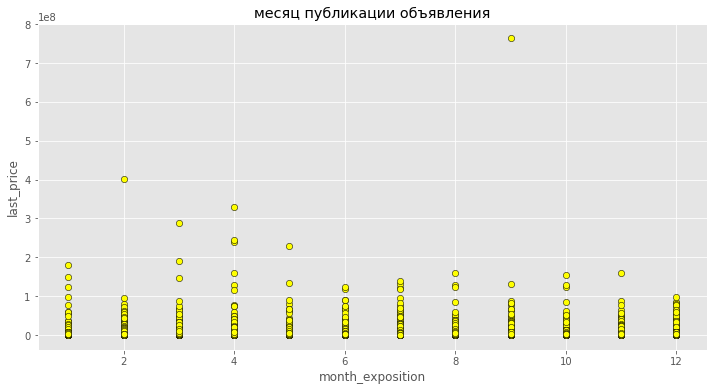

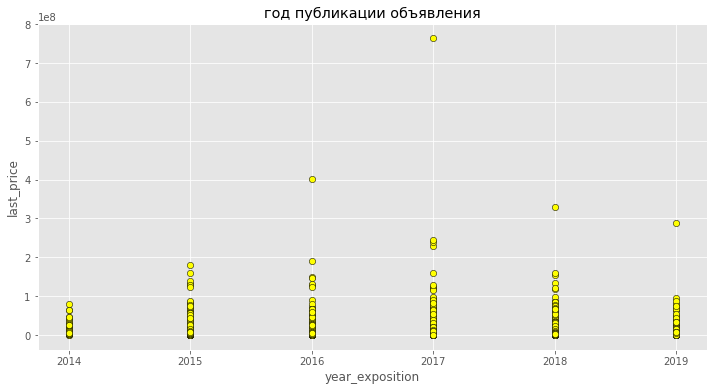

In [84]:
for key, value in date_features.items():
    # построим диаграмму рассеяния между датой опубликования объявления (ось абсцисс) и
    # стоимостью квартир (ось ординат)
    apartments_no_outliers.plot(kind='scatter',x=key, y='last_price', color='yellow',s=40,
                                edgecolor='black', figsize=(12,6)).set(title=value)
    # отображение диаграмм
    plt.show()

In [85]:
# определим цикл, который
for key, value in date_features.items():
    print('Средняя величина стоимости квартир | ',value,':')
    # формирует сводные таблицы, отражающие среднюю стоимость квартир в разрезе даты публикации объявления:
    # каждой недели, каждого месяца и года
    print(apartments_no_outliers.pivot_table(index=key, values='last_price'))

Средняя величина стоимости квартир |  неделя публикации объявления :
                   last_price
week_exposition              
1                5.458223e+06
2                6.261921e+06
3                5.790990e+06
4                8.773800e+06
5                5.904996e+06
6                6.157402e+06
7                7.416198e+06
8                5.766854e+06
9                6.330392e+06
10               5.591798e+06
11               6.272794e+06
12               7.168298e+06
13               7.098176e+06
14               7.535534e+06
15               6.566427e+06
16               5.627944e+06
17               5.696463e+06
18               6.750638e+06
19               7.512433e+06
20               5.860164e+06
21               6.533281e+06
22               6.793643e+06
23               6.088540e+06
24               6.348142e+06
25               6.657988e+06
26               6.090748e+06
27               5.887739e+06
28               8.534314e+06
29               5.689953e+06
3

Видим, что однозначной зависимости между неделью года и стоимостью цен на квартиры не наблюдается: имеем более равномерное распределение цен по неделям, без определенной закономерности.

Аналогично неделям, однозначной зависимости между месяцем опубликования объяаления и стоимостью квартир не наблюдается: имеем равномерное распределение по месяцам.

Видим, что начиная с 2014-го года цены на квартиры повышались до 2018-го года, после чего последовал легкий спад цен на квартиры.

In [86]:
# осуществим подсчет количества объявлений в разрезе населенных пунктов
# выделим первые значений
top10_loc_lbls = apartments_no_outliers['locality_name'].value_counts().reset_index().head(10)
# вывод запроса
top10_loc_lbls

,index,locality_name
0,Санкт-Петербург,12109
1,Всеволожск,365
2,Пушкин,350
3,Колпино,314
4,Гатчина,299
5,посёлок Шушары,293
6,Выборг,231
7,Красное Село,167
8,Петергоф,142
9,Сертолово,135


Видим, что Санкт-Петербург занимает лидирующую позицию по количеству объявлений.

In [87]:
# переименуем столбцы на соответствующие названия
top10_loc_lbls.columns = ['locality_name','values']
# вывод результатов
top10_loc_lbls

,locality_name,values
0,Санкт-Петербург,12109
1,Всеволожск,365
2,Пушкин,350
3,Колпино,314
4,Гатчина,299
5,посёлок Шушары,293
6,Выборг,231
7,Красное Село,167
8,Петергоф,142
9,Сертолово,135


In [88]:
# сформируем подвыборку из населенных пунктов, лидирующих по количеству обяъвлений
apartments_top_10_locations = (apartments_no_outliers
                               .loc[apartments_no_outliers['locality_name'].isin(top10_loc_lbls['locality_name'])]) 

In [89]:
# вывод первых 5-ти наблюдений новой подвыборки
apartments_top_10_locations.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_exposition,month_exposition,year_exposition,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,58,120370.370370,10,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,...,0,0.0,81,82920.792079,49,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,2,574.0,558,92785.714286,34,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,...,3,234.0,424,408176.100629,30,7,2015,другой,0.560000,0.200000
9,18,5400000.0,61.0,2017-02-26,3,2.60,9.0,43.60,7,False,...,0,0.0,289,88524.590164,8,2,2017,другой,0.714754,0.106557


In [90]:
# сгруппируем по населенным пунктам, далее осуществим подсчет средней стоимости кв.м. квартиры и
# осуществим сортировку по убыванию
top_10_loc_price_per_meter = apartments_top_10_locations.groupby('locality_name')['price_per_meter'].mean().sort_values(ascending=False)
top_10_loc_price_per_meter.reset_index()

,locality_name,price_per_meter
0,Санкт-Петербург,113060.990427
1,Пушкин,102976.320401
2,Петергоф,85910.367298
3,посёлок Шушары,76870.560176
4,Колпино,75564.829531
5,Красное Село,72532.231065
6,Гатчина,68704.444352
7,Сертолово,68651.321864
8,Всеволожск,67907.709228
9,Выборг,58313.635357


Санкт-Петербург занимает не только лидирующую позицию по количеству объявлений, но и по средней стоимости $м^{2}$ квартиры, в частности 113 473 у.е. Наименьшая средняя стоимость $м^{2}$ в размере 58 313 у.е. наблюдается в г. Выборг, расположенный на северо-восточной части Финского залива.\
Ниже отобразим зависимость между наименованием населенного пункта (ось абсцисс) и средней стоимостью квартиры (ось ординат).

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text xticklabel objects>)

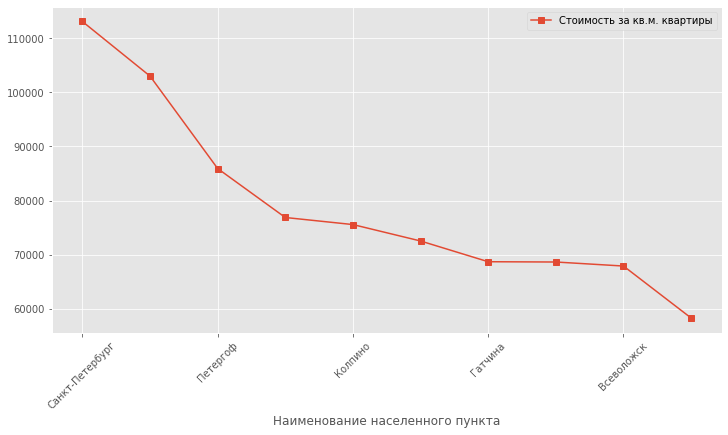

In [91]:
# построим график стоимости цен за кв.м. в зависимости от местоположения
top_10_loc_price_per_meter.reset_index().plot(kind='line',  x='locality_name',y='price_per_meter',
                                              marker='s', label='Стоимость за кв.м. квартиры',figsize=(12,6))
# для наглядности повернем на 45 градусов подписи оси абсцисс (названия населенных пунктов)
plt.xlabel('Наименование населенного пункта')
plt.xticks(rotation=45)

---
### Промежуточные выводы

Таким образом, наибольшую значимость в определении стоимости квартиры представляет собой **общая площадь квартиры**. Далее, следует жилая площадь, площадь кухни.. Замыкающую позицию имеют этаж квартиры, высота потолков.\
Переменные, связанные с датой публикации - неделя, месяц, год - не связаны со стоимостью квартиры.\
В отношении квартир, которые находятся на первом и последнем этажах, наблюдаем очень слабую связь с этажом  и стоимостью квартиры, что отражено в коэффициенте корреляции равном 0.091.\
По количеству объявлений 10 первых позиций занимают следующие населенные пункты: Санкт-Петербург, поселек Мурино, поселек Шушары, Всеволожск, Пушкин, Колпино, поселек Парголово, Гатчина, деревня Кудрово, Выборг.\
Наибольшая средняя стоимость за кв.м. в размере 113 473 у.е. наблюдается в Санкт-Петербург, наименьшая в размере 58 313 у.е. наблюдается в городе Выборг.

---
**Вопрос №2**: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "

In [92]:
# сформируем выборку из наблюдений по Санкт-Петербургу посредством запроса
apartments_SPb = apartments_no_outliers.query('locality_name == "Санкт-Петербург" ')

In [93]:
# вывод первых пяти наблюдений выборки по Санкт-Петербургу
apartments_SPb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,week_exposition,month_exposition,year_exposition,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,58,120370.370370,10,3,2019,другой,0.472222,0.231481
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,...,2,574.0,558,92785.714286,34,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.04,9,False,...,3,234.0,424,408176.100629,30,7,2015,другой,0.560000,0.200000
9,18,5400000.0,61.0,2017-02-26,3,2.60,9.0,43.60,7,False,...,0,0.0,289,88524.590164,8,2,2017,другой,0.714754,0.106557
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.30,3,False,...,2,553.0,137,127525.252525,46,11,2017,другой,0.512626,0.214646


In [94]:
# осуществим подсчет расстояния в км до центра города посредством деления расстояния в метра на 1000,
# округлим результат до целых значений, при этом воспользуемся исключениями
try:
    apartments_SPb.loc[:,'km_to_center'] = round((apartments_SPb.loc[:,'cityCenters_nearest'] / 1000), 0)
except:
    print('Стоит пересмотреть подход')

/home/urma/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/urma/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [95]:
# проверим результаты подсчета расстояния в км
apartments_SPb[['cityCenters_nearest','km_to_center']].head()

,cityCenters_nearest,km_to_center
0,16028.0,16.0
2,13933.0,14.0
3,6800.0,7.0
9,15008.0,15.0
10,13878.0,14.0


In [96]:
# осуществим группировку по расстоянию до центра в км, далее произведем расчет средней стоимости за кв.м.
price_vs_km_to_center = apartments_SPb.groupby('km_to_center')['price_per_meter'].mean().reset_index()
# вывод результатов расчетов
print('Более близкие к центру города квартиры')
print(round(price_vs_km_to_center.head()),0)
print('Более отдаленные от центра города квартиры')
print(round(price_vs_km_to_center.tail()),0)

Более близкие к центру города квартиры
   km_to_center  price_per_meter
0           0.0         175127.0
1           1.0         178292.0
2           2.0         157526.0
3           3.0         120002.0
4           4.0         131093.0 0
Более отдаленные от центра города квартиры
    km_to_center  price_per_meter
25          25.0          82474.0
26          26.0          89354.0
27          27.0         132116.0
28          28.0          81162.0
29          29.0          72953.0 0


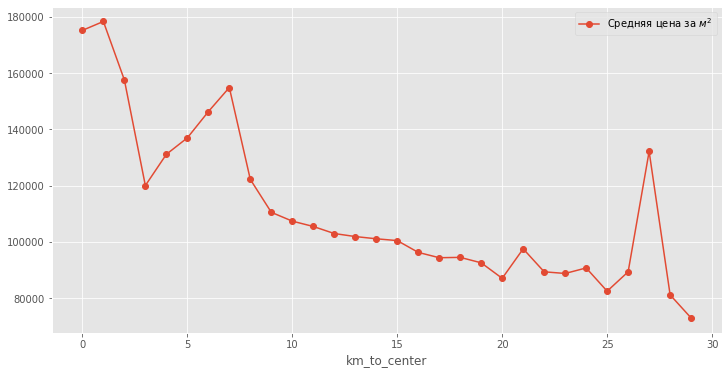

In [97]:
# построим линейный график, который иллюстрирует изменение средней стоимости цены за кв.м. квартиры (ось абсцисс)
# в зависимости от расстояния до центра города в км (ось ординат), определим круг в качестве маркера
price_vs_km_to_center.plot(kind='line', x='km_to_center', y='price_per_meter',
                           grid=True, marker='o', figsize=(12,6),label='Средняя цена за $м^{2}$')

### Промежуточные выводы

Таким образом, видим что резкий спад происходит в зоне более чем двух км. Тем самым можно предполагать то, что центральная зона находится в радиусе **не более 2-х км** от центра города.\
Стоимость кв.м. в квартире, которая находится прямо в центре Санкт-Петербурга стоит 171 832 у.е. (внушительная цена), в километре от центра стоимость кв.м. снижается до 178 292 у.е., в двух км от центра: 157 526 у.е. На расстоянии 29 км от центра стоимость кв.м. квартиры стоит 72 953 у.е.

---
**Вопрос №3**: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"

In [98]:
# выделим сегмент квартир в центре (расстояние до центра города составляет менее 2-х км) 
apartments_SPb_center = apartments_SPb.query('km_to_center <= 2')

In [99]:
# выделим сегмент квартир вне центра (расстояние до центра города составляет более 2-х км)  
apartments_SPb_not_center = apartments_SPb.query('km_to_center > 2')

In [100]:
# определим общее количество квартир центральной зоны Санкт-Петербурга
print('Количество квартир центральной зоны Санкт-Петербурга: {}'.format(apartments_SPb_center.shape[0]))
# определим количество квартир внецентральной зоны Санкт-Петербурга
print('Количество квартир внецентральной зоны Санкт-Петербурга: {}'.format(apartments_SPb_not_center.shape[0]))

Количество квартир центральной зоны Санкт-Петербурга: 546
Количество квартир внецентральной зоны Санкт-Петербурга: 11563


In [101]:
# выделим характеристики квартир, которые находятся в Санкт-Петербурге
SPb_apartment_features = ['total_area','last_price', # общая площадь, стоимость квартиры
                          'price_per_meter','rooms', # цена за кв.м., количество комнат
                          'ceiling_height','floor', # высота потолка, этаж на котором находится квартира
                          'km_to_center','first_day_exposition'] # расстояние до центра в км, первый день публикации

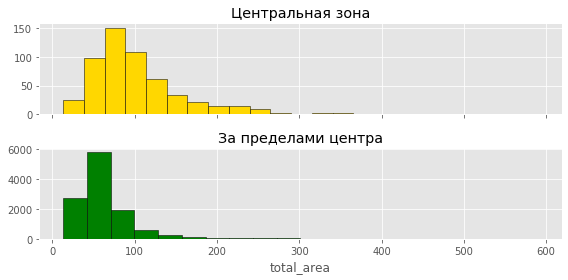

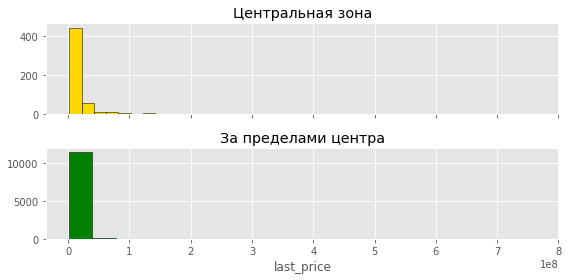

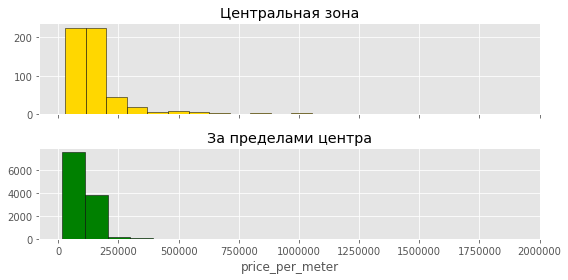

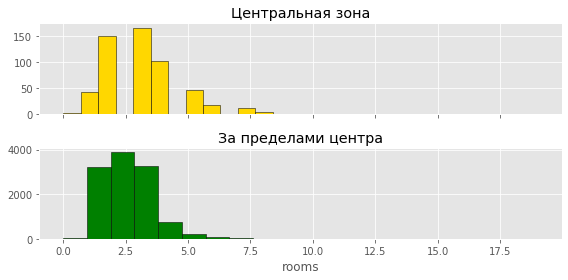

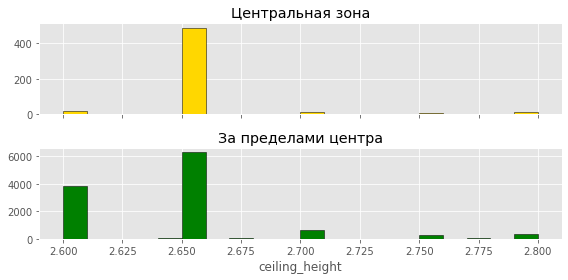

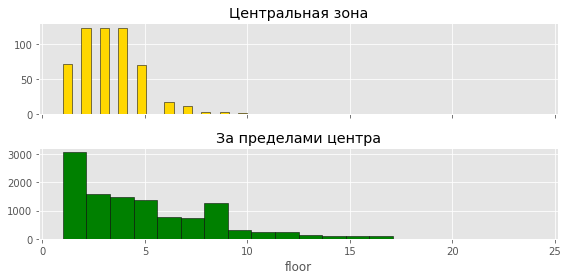

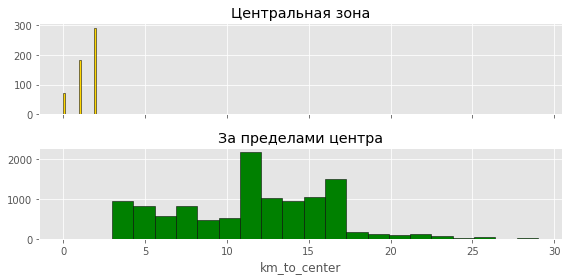

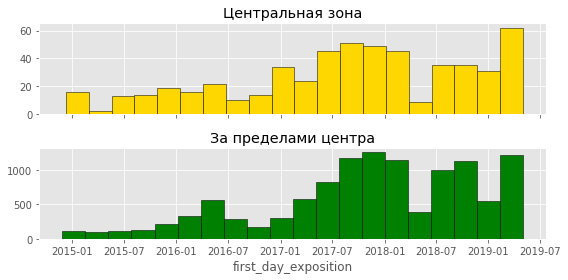

In [102]:
# определим цикл, который строит гистограммы характеристик квартир для двух месторасположений
# (1) Центральная зона Санкт-Петербурга (СПб), (2) Внецентральная зона СПб
for feature in SPb_apartment_features:
    # определим подграфики, зададим размерность графиков, приравняем оси абсцисс
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,4), sharex=True)
    # гистограммы характеристик квартир центральной зоны СПб отображены золотым цветом
    apartments_SPb_center[feature].hist(ax=axes[0], color='gold',
                                        bins=20,edgecolor='black').set(title='Центральная зона')
    # гистограммы характеристик квартир внецентральной зоны СПб отображены зеленым цветом
    apartments_SPb_not_center[feature].hist(ax=axes[1],edgecolor='black',
                                            color='green', bins=20).set(title='За пределами центра',
                                                                                    xlabel=feature)
    # "подтянем" графики
    plt.tight_layout()
    # отображение графиков
    plt.show()

### Промежуточные выводы

Квартиры центральной зоны имеют немного б**о**льшую площадь по сравнению с квартирами вне центральной зоны Санкт-Петербурга.

Как и следовало ожидать: стоимость квартир центральной зоны СПб имеет более тяжелый правый хвост распределения стоимости кв.м. квартир по сравнению с квартирами внецентральной зоны.

Значительная часть квартир как внутри так и вне центральной зоны имеют число комнат от 1-ой до 3-х. Также в обеих зонах наблюдается толстый правый хвост: есть наблюдения с весьма большим количеством комнат.

В отношении высоты потолка, квартиры центральной и внецентральной зон между собой значительно не отличаются.

Наблюдаем тяжелый правый хвост распределения этажей квартир внецентральной зоны.

Значительная часть квартир внецентральной зоны СПб находятся на расстоянии от центра в пределе от 11-ти до 12-ти км.

В отношении первоначальной даты размещения публикации, квартиры центральной и внецентральной зон СПб значительно друг от друга не отличаются: с начала отчетного периода и до июля 2016 года наблюдалось постепенное повышение. Однако в период между июлем 2016 года и январем 2017 года наблюдался спад публикаций объявления. Затем вновь рост вплоть до апреля 2018 года. В целом, наблюдаем схожую картину между двумя зонами в отношении первого дня публикации объявления о продаже жилья.

### Шаг 5. Общий вывод

- Наибольшая часть пропущенных значений наблюдается в переменных "наличие апартаментов, балконов, парков, прудов, количество парков и водоемов в радиусе 3 км". Возможной причиной является то, что, действительно, в данных квартирах отсутствуют (а) апартаменты, (б) балконы, (в) парки и (г) пруды в близлежащей местности. 
- Количество прудов и парков в радиусе 3 км переведены с формата с плавающей точкой в целочисленный формат.
- 75% квартир имеют высоту потолка менее 2.8 метра.
- Наибольшая часть квартир (а) отдалена от ближайшего парка на расстоянии от 400 до 600 метров, (б) не имеет парков в радиусе 3 км, (в) имеет один пруд в радиусе 3 км, (г) отдалена от ближайшего пруда от 400 до 500 метрами, (д) находится на расстоянии от ближайшего аэропорта в пределе от 18 до 25 км, (е) находится на расстоянии до центра города в пределе от 8 до 12 км, (ж) имеет публикацию в пределе от 1 до 180-ти дней, (з) находится в доме этажность которых варьирует в пределе от 1-го до 8-ми.
- Наиболее ранняя дата размещения объявления: 21 ноября 2014 года, наиболее поздняя дата: 3 мая 2019 года.
- Зачастую отношение жилой площади к общей площади квартиры составляет 56%. Это и правдоподобно то, что половину квартиры (чуть больше) занимает жилая площадь.
- Среднее значение и медиана процентного соотношения площади кухни к общей площади квартиры близки к 20-ти процентам.
- Относительно быстрое время реализации жилья составляет 43 дня (величина первого квартиля), относительно долгое время реализации лежит в промежутке от третьего квартиля 237 дня и до максимального количества дней публикации 1 619 дней (более четырех лет). **Медиана** количества дней публикации составляет 94 дня, т.е. в среднем продажи занимают чуть более трех месяцев. **Среднее количество** дней публикации объявления равно 185-ти дням.
- Обнаружили и удалили редкие и выбивающиеся наблюдения, а именно квартиры у которых: (а) расстояние от ближайшего аэропорта превышает 70.522 км, от центра города превышает 34.758 км, (б) процентное отношение жилой площади к общей площади квартиры больше 83 процента и меньше 3 процентов, (в) площадь кухни к общей площади больше 35 процентов, (г) общая площадь превышает 600 кв.м, (д) этаж выше 17-го, (е) дом выше 30-ти этажей.
**Ответы на вопросы**\
*Вопрос №1*: Таким образом, наибольшую значимость в определении стоимости квартиры представляет собой **общая площадь квартиры**. Далее, следует жилая площадь, площадь кухни.. Замыкающую позицию имеют этаж квартиры, высота потолков. Переменные, связанные с датой публикации - неделя, месяц, год - не связаны со стоимостью квартиры.
В отношении квартир, которые находятся на первом и последнем этажах, наблюдаем очень слабую связь с этажом  и стоимостью квартиры, что отражено в коэффициенте корреляции равном 0.091. По количеству объявлений 10 первых позиций занимают следующие населенные пункты: Санкт-Петербург, поселек Мурино, поселек Шушары, Всеволожск, Пушкин, Колпино, поселек Парголово, Гатчина, деревня Кудрово, Выборг. Наибольшая средняя стоимость за кв.м. в размере 113 473 у.е. наблюдается в Санкт-Петербург, наименьшая в размере 58 313 у.е. наблюдается в городе Выборг.\
*Вопрос №2*: Таким образом, видим что резкий спад происходит в зоне более чем двух км. Тем самым можно предполагать то, что центральная зона находится в радиусе **не более 2-х км** от центра города. Стоимость кв.м. в квартире, которая находится прямо в центре Санкт-Петербурга стоит 171 832 у.е. (внушительная цена), в километре от центра стоимость кв.м. снижается до 178 292 у.е., в двух км от центра: 157 526 у.е. На расстоянии 29 км от центра стоимость кв.м. квартиры стоит 72 953 у.е.\
*Вопрос №3*: Квартиры центральной зоны имеют немного б**о**льшую площадь по сравнению с квартирами вне центральной зоны Санкт-Петербурга. Стоимость квартир центральной зоны СПб имеет более тяжелый правый хвост распределения стоимости квартир по сравнению с квартирами внецентральной зоны. Значительная часть квартир внецентральной зоны СПб находятся на расстоянии от центра в пределе от 11-ти до 12-ти км. В отношении высоты потолка и первой даты размещения публикации о продаже недвижимости, квартиры центральной и внецентральной зон между собой значительно не отличаются.